# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [22]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right,
    plot

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [23]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [24]:
mygus = Analysis(params)

In [25]:
mygus.getdata()

Getting GUS data...
./gus_data/zgony_wg_tygodni.zip exists, so not downloaded
*.xlsx or *.xls files exist in ./gus_data/zgony_wg_tygodni, so zip file not extracted
*.xls files exist in ./gus_data/zgony_wg_tygodni, so *.xlsx files not converted to *.xls
Making dictionary of year GUS data frames for each year: year_data_dict {int : pandas.DataFrame}
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Merging GUS data frames from dict in a single data frame: all_years_df
Done.


In [26]:
# mygus.all_years_df

In [32]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

df_og = df.query(Q).copy(deep=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'

In [34]:
# df_og

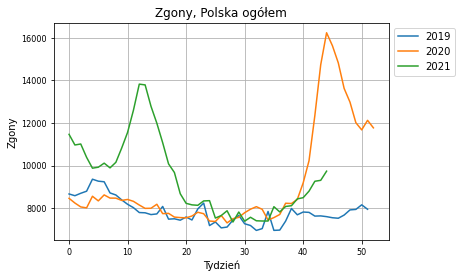

In [37]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all,
#     set_legend_right,
#     plot
# )



plotopts = dict_of(
    plotdf=df_og, 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Polska ogółem',
    fontsize = 8
    )

plot(**plotopts);

AttributeError: 'list' object has no attribute 'plot'

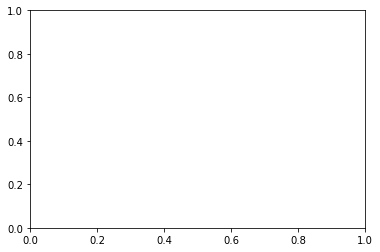

In [63]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Lubelskie")'
dfl=dict()
dfl["Lubelskie"] = (df.query(Q).copy(deep=True))
dfl["Lubelskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
dfl["Lubelskie"] = dfl["Lubelskie"].set_index('Rok').T.reset_index(drop=True)
dfl["Lubelskie"].index.name = 'Tydzień'

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Podlaskie")'

dfl["Podlaskie"] = (df.query(Q).copy(deep=True))
dfl["Podlaskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
dfl["Podlaskie"] = dfl["Podlaskie"].set_index('Rok').T.reset_index(drop=True)
dfl["Podlaskie"].index.name = 'Tydzień'

plotopts = dict_of(
    plotdf=[dfl["Lubelskie"],dfl["Podlaskie"]], 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Lubelskie',
    fontsize = 8
    )

plot(**plotopts);

In [61]:
dfl.values()

dict_values([Rok     2000 2001 2002 2003 2004 2005 2006 2007 2008 2009  ... 2012 2013 2014  \
Tydzień                                                    ...                  
0        459  485  431  510  422  489  440  417  514  494  ...  443  542  447   
1        489  474  462  471  497  442  446  502  491  494  ...  404  514  422   
2        531  401  477  453  438  491  443  423  457  526  ...  455  549  423   
3        641  543  461  455  479  469  474  463  488  551  ...  448  509  412   
4        660  456  435  439  502  476  469  436  467  559  ...  452  475  485   
5        603  480  422  474  537  495  458  516  452  631  ...  498  471  479   
6        525  436  449  470  490  461  467  495  463  522  ...  452  475  443   
7        475  470  428  452  478  484  443  552  467  514  ...  417  465  412   
8        447  452  405  487  496  450  416  562  457  512  ...  422  460  430   
9        478  447  432  553  431  536  475  502  499  475  ...  417  462  422   
10       478  4